In [1]:
# from google.colab import drive
# drive.mount('/gdrive')

In [2]:
from fastai.vision import *
from datetime import datetime

import matplotlib.pyplot as plt

In [3]:
date = datetime.now().date()
time_now = datetime.now().time()
time = f"{time_now.hour}-{time_now.minute}-{time_now.second}"

In [4]:
'''
Severity Levels

0 - 'No_DR',
1 - 'Mild',
2 - 'Moderate',
3 - 'Severe',
4 - 'Proliferate_DR'
'''

classes = ['No_DR', 'Mild', 'Moderate', 'Severe', 'Proliferate_DR']

In [5]:
path = Path('../input/grayscale_images')
path.ls()

[WindowsPath('../input/grayscale_images/export.pkl'),
 WindowsPath('../input/grayscale_images/Mild'),
 WindowsPath('../input/grayscale_images/Moderate'),
 WindowsPath('../input/grayscale_images/No_DR'),
 WindowsPath('../input/grayscale_images/Proliferate_DR'),
 WindowsPath('../input/grayscale_images/Severe')]

In [6]:
# remove the images that we cannot open
# for c in classes:
#     print(c)
#     verify_images(path/c, delete=True, max_size=500)

In [7]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train='.', valid_pct=0.2, 
                                  ds_tfms=get_transforms(), size=224, 
                                  num_workers=4, bs=16).normalize(imagenet_stats)

In [8]:
data.classes

['Mild', 'Moderate', 'No_DR', 'Proliferate_DR', 'Severe']

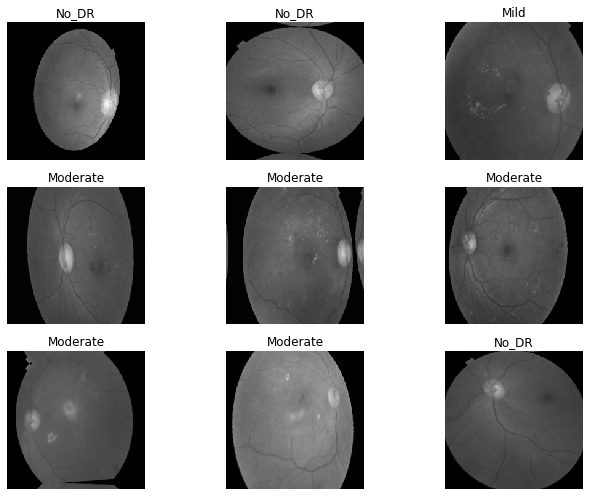

In [9]:
data.show_batch(rows=3, figsize=(10, 7))

In [10]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['Mild', 'Moderate', 'No_DR', 'Proliferate_DR', 'Severe'], 5, 2930, 732)

In [11]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate, model_dir='../')
# path = users/.cache/torch

In [12]:
learn.fit_one_cycle(1)    

epoch,train_loss,valid_loss,error_rate,time
0,1.188461,0.812697,0.275956,01:02


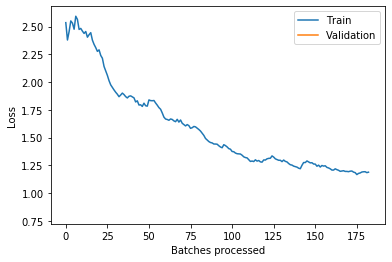

In [13]:
learn.recorder.plot_losses()
plt.savefig(f"../models/plots/{date}_{time}_loss_grayscale_stage1.png")
plt.show()

In [14]:
learn.save(f"../models/{date}_{time}_grayscale_stage_1")

In [15]:
learn.unfreeze()

In [16]:
learn.lr_find()

epoch,train_loss,valid_loss,error_rate,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


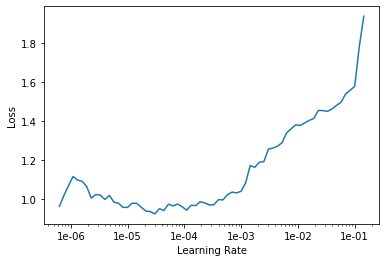

In [17]:
learn.recorder.plot()
plt.savefig(f"../models/plots/{date}_{time}_lrfind_loss_grayscale.png")
plt.show()

In [18]:
learn.fit_one_cycle(1, max_lr=slice(1e-05, 1e-04))

epoch,train_loss,valid_loss,error_rate,time
0,0.917010,0.692467,0.243169,01:03


In [19]:
learn.save(f"../models/{date}_{time}_grayscale_stage_2")

In [20]:
learn.load(f"../models/{date}_{time}_grayscale_stage_2")

Learner(data=ImageDataBunch;

Train: LabelList (2930 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Mild,Mild,Mild,Mild,Mild
Path: ..\input\grayscale_images;

Valid: LabelList (732 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
No_DR,Moderate,Moderate,Moderate,Moderate
Path: ..\input\grayscale_images;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, m

In [21]:
interp = ClassificationInterpretation.from_learner(learn)

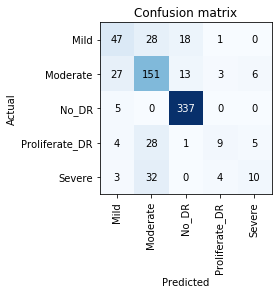

In [22]:
interp.plot_confusion_matrix()
plt.savefig(f"../models/plots/{date}_{time}_confusion_matrix_grayscale.png")

In [23]:
learn.export(f"{date}_{time}_grayscale.pkl")

In [24]:
defaults.device = torch.device('cpu')

In [25]:
img = open_image('../input/test_images/ffec9a18a3ce.png')
img

FileNotFoundError: [Errno 2] No such file or directory: '../input/test_images/ffec9a18a3ce.png'

In [ ]:
learn = load_learner(path)

In [ ]:
pred_class, pred_idx, outputs = learn.predict(img)
pred_class